[자동차 연비 예측]

In [ ]:
## 모듈로딩 - 데이터 분석용
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

In [99]:
## 데이터 준비
DATA = '../data/auto_mpg.csv'

In [100]:
## - 데이터 로딩
DF = pd.read_csv(DATA, engine='python')
DF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [101]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


[2] 데이터 분석 - 탐색적 분석 <hr>

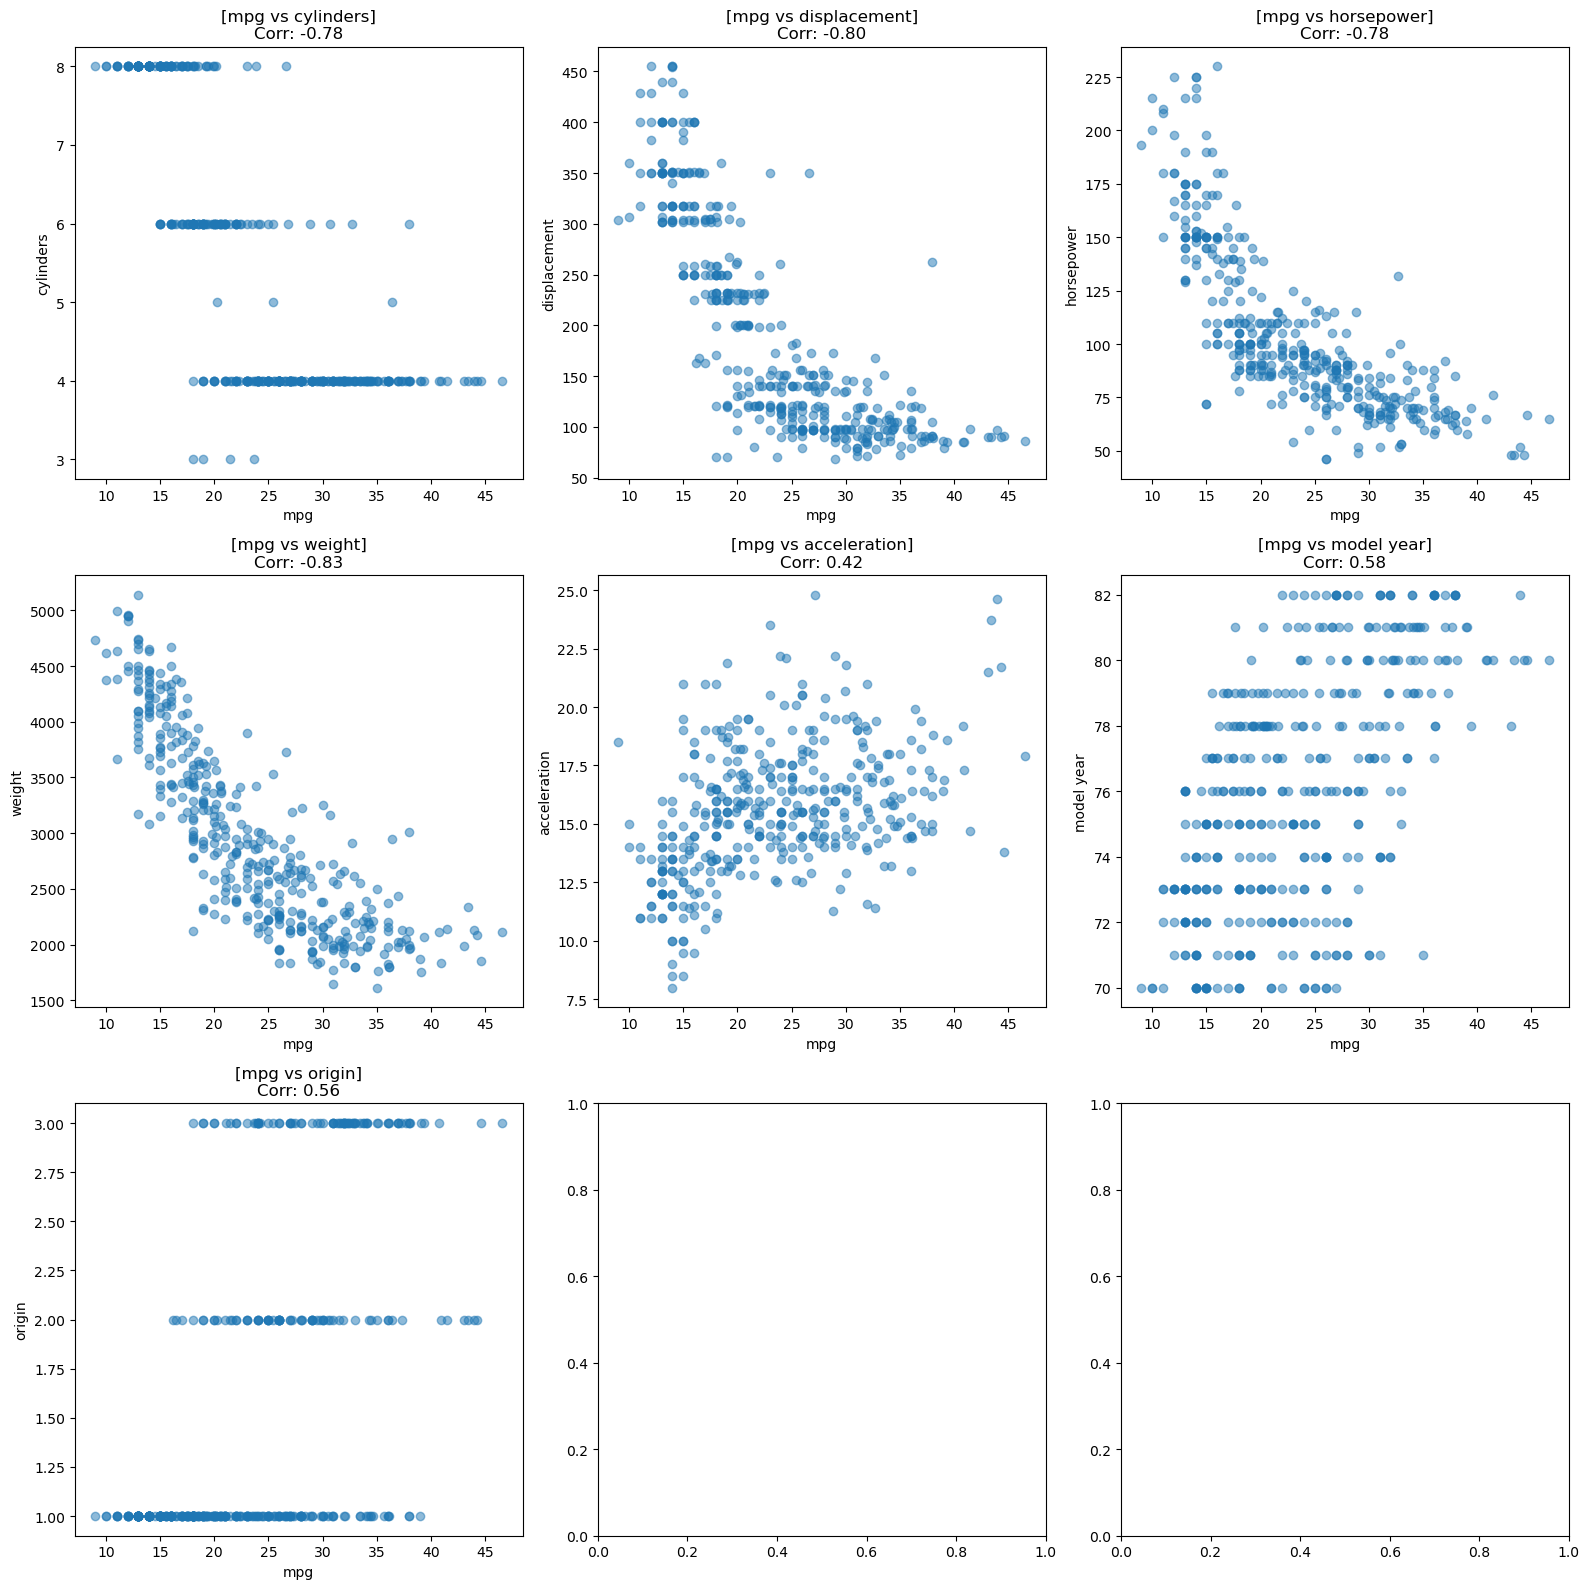

In [102]:
# 사용할 변수 목록
columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

# horsepower 데이터가 숫자가 아닌 경우 변환
DF['horsepower'] = pd.to_numeric(DF['horsepower'], errors='coerce')

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16)) # 3X3그래프 배치

# 컬럼별 산점도 그래프 생성
for idx, col in enumerate(columns):
	row = idx//3
	col_idx = idx % 3

	# 각 그래프에 산점도 플롯 추가
	ax = axes[row, col_idx]
	correlation = DF['mpg'].corr(DF[col])  # 상관계수 계산
	ax.scatter(DF['mpg'], DF[col], alpha=0.5)
	ax.set_xlabel('mpg')
	ax.set_ylabel(col)
	ax.set_title(f'[mpg vs {col}]\nCorr: {correlation:.2f}')

# 전체 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()	

mpg 연관성 있는 데이터
- cylinders, displacement, horsepower, weight

In [103]:
# 데이터 준비
feature = DF[['cylinders', 'displacement', 'horsepower', 'weight']]  # 피처: cylinders, displacement, horsepower, weight
target = DF['mpg']  # 타겟: mpg

[3] 데이터셋 준비
- 피처와 타겟 분리
- 학습용/검증용/테스트용 데이터셋 분리 => 학습용과 테스트용으로만 분리

In [104]:
## 3-1 피처와 타겟 분리
featureDF = feature
targetSR = target
print(f"featureDF => {featureDF.ndim}D, targetSr => {targetSR.ndim}D")  

featureDF => 2D, targetSr => 1D


In [105]:
# 훈련 데이터와 테스트 데이터로 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(featureDF,
													targetSR,
													test_size=0.2, 
													random_state=10)
print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape} / y_test => {X_test.ndim}D, {y_test.shape}")

X_train => 2D (318, 4) / X_test => 2D, (80, 4)
y_train => 1D (318,) / y_test => 2D, (80,)


In [106]:
# X_train과 y_train을 합쳐서 NaN이 포함된 행 전체 제거
train_data = pd.concat([X_train, y_train], axis=1)
train_data = train_data.dropna()

# 다시 분리
X_train = train_data.drop(columns=[y_train.name])  # y_train 컬럼 제외
y_train = train_data[y_train.name]  # y_train 값만 선택

In [107]:
# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [108]:
## 학습 후 모델에 적용되는 a,b: 모델 파라미터
print(f"기울기 / 가중치 model.coef_ {model.coef_}")
print(f"절편값 model.intercept_ {model.intercept_}")

기울기 / 가중치 model.coef_ [-0.27719817 -0.0017607  -0.04116172 -0.00534532]
절편값 model.intercept_ 45.69673787343025


In [109]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import train_test_split

[4] 성능 평가 <hr>
- 모델 성능 평가
- 손실 계산

In [110]:
# 예측값 계산
y_pred = model.predict(X_train)
score = model.score(X_train, y_pred)
rmse = root_mean_squared_error(y_train, y_pred)

print(f"X_train score {score}, rmse {rmse}")

X_train score 1.0, rmse 4.20529539911754


In [111]:
# X_test과 y_test을 합쳐서 NaN이 포함된 행 전체 제거
test_data = pd.concat([X_test, y_test], axis=1)
test_data = test_data.dropna()

# 다시 분리
X_test = test_data.drop(columns=[y_test.name])  # y_test 컬럼 제외
y_test = test_data[y_test.name]  # y_test 값만 선택

In [112]:
y_pred = model.predict(X_test)
score = model.score(X_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"X_test score {score}, rmse {rmse}")

X_test score 1.0, rmse 4.273139554458609


검증용 데이터의 rmse가 높다 => 과대적합

In [113]:
## - 학습용, 테스트용 DS에 대한 모델 적합도, 비용 계산 
result=[]

for data, label in [[X_train, y_train], [X_test, y_test]]:
    ## - 모델 성능 평가 ==> score(2D_피쳐, 1D_타겟) : 모델 적합도
    score = model.score(data, label)

    ## - 손실 계산 평가 ==> rmse, mse, mae....(1D_타겟, 1D_예측값)
    pre_label = model.predict(data)
    rmse = root_mean_squared_error(label, pre_label)
    mse = mean_squared_error(label, pre_label)
    mae = mean_absolute_error(label,pre_label)

    result.append([score, rmse, mse, mae])

In [114]:
## 성능평가 결과 
resultDF = pd.DataFrame(result, 
                        columns=['score','rmse','mse','mae'],
                        index=['Train','Test'])

In [115]:
## - 훈련용과 테스트용 성능 차이 행 추가 
resultDF.loc['diff']= (resultDF.loc['Train']  - resultDF.loc['Test']).abs()
resultDF

,score,rmse,mse,mae
Train,0.711050,4.205295,17.684509,3.237587
Test,0.688096,4.273140,18.259722,3.277753
diff,0.022954,0.067844,0.575212,0.040166


- [학습 결과 분석]
    * 모델 적합도 : Train > Test : 과대적합 
    * 비용 계산값 : Train < Test : 과대적합

- [해결방안]
    * 과도한  반복 학습 => scikit-learn에서는 개발자 제어 불가 X
    * 모델 복잡한가?  => 피쳐가 많은가? 피쳐는 4개 있음 다항회귀 모델 실험 필요!
    * 데이터가 충분한가? => 데이터 충분하지 않음!  K-Fold Cross Validation을 사용하여 평가.
    * 해당 알고리즘의 결과물 분석 => 선형식과 데이터의 관계 => 완벽한 선형이 아님.. 오히려 곡선! 

In [116]:
# 데이터 정규화 (표준화)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  

In [117]:
# 다항 특성 변환 (2차 다항 회귀)
poly = PolynomialFeatures(degree=2)

In [118]:
# 데이터셋 준비 => 학습용, 검증용, 테스트용 
# 학습용 : 규칙과 패턴 찾기 위해 사용되는 데이터셋
# 검증용 : 모델 학습 진행이 제대로 되고 있는지 확인용 데이터셋
# 테스트용 : 학습 완료 후 검사용 데이터셋

# 학습용 피쳐 제공 (학습용을 기준으로 정보 제공)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [119]:
# 모델 초기화
knn = KNeighborsRegressor(n_neighbors=10)
lm = LinearRegression()
plm = LinearRegression()  # 다항 회귀는 선형 회귀 모델로 학습

In [120]:
knn.fit(X_train, y_train)
lm.fit(X_train, y_train)
plm.fit(X_train_poly, y_train)

LinearRegression()

In [121]:
# 모델 예측
y_pred_knn = knn.predict(X_test)
y_pred_lm = lm.predict(X_test)
y_pred_plm = plm.predict(X_test_poly)

In [122]:
# MSE, RMSE, R² 계산 및 출력
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNN - MSE: {mse_knn:.4f}, RMSE: {rmse_knn:.4f}, R²: {r2_knn:.4f}")

mse_lm = mean_squared_error(y_test, y_pred_lm)
rmse_lm = np.sqrt(mse_lm)
r2_lm = r2_score(y_test, y_pred_lm)
print(f"Linear Regression - MSE: {mse_lm:.4f}, RMSE: {rmse_lm:.4f}, R²: {r2_lm:.4f}")

mse_plm = mean_squared_error(y_test, y_pred_lm)
rmse_plm = np.sqrt(mse_plm)
r2_plm = r2_score(y_test, y_pred_plm)
print(f"Polynomial Regression - MSE: {mse_plm:.4f}, RMSE: {rmse_plm:.4f}, R²: {r2_plm:.4f}")

KNN - MSE: 12.9478, RMSE: 3.5983, R²: 0.7788
Linear Regression - MSE: 18.2597, RMSE: 4.2731, R²: 0.6881
Polynomial Regression - MSE: 18.2597, RMSE: 4.2731, R²: 0.7394


In [123]:
# 결과 비교 데이터프레임
result = pd.DataFrame([
    [mse_knn, rmse_knn, r2_knn],
    [mse_lm, rmse_lm, r2_lm],
    [mse_plm, rmse_plm, r2_plm]
], columns=['MSE', 'RMSE', 'R² Score'], 
index=['KNN', 'Linear Regression', 'Polynomial Regression'])
result

,MSE,RMSE,R² Score
KNN,12.947779,3.598302,0.778832
Linear Regression,18.259722,4.273140,0.688096
Polynomial Regression,18.259722,4.273140,0.739426


- 결과 해석
KNN (K-최근접 이웃)

가장 낮은 MSE (12.94)와 RMSE (3.59)를 기록 → 가장 예측 오차가 작음.
R² Score: 0.7788 → 데이터의 변동성을 77.88% 설명 가능.
즉, KNN이 가장 성능이 좋음.
선형 회귀 (Linear Regression)

MSE: 18.26, RMSE: 4.27 → KNN보다 오차가 큼.
R² Score: 0.688 → 데이터 설명력이 68.81%로 다소 낮음.
다항 회귀 (Polynomial Regression)

MSE: 18.26, RMSE: 4.27 → 선형 회귀와 동일한 오차.
하지만 R² Score: 0.739 → 선형 회귀보다 데이터 설명력이 더 높음.

-결론
KNN이 가장 좋은 성능을 보임 (MSE, RMSE가 가장 낮고 R² Score가 가장 높음).
다항 회귀는 선형 회귀보다 R² Score가 높아 다소 더 좋은 성능을 보일 가능성이 있음.
하지만 다항 회귀와 선형 회귀의 MSE와 RMSE가 동일한 것은 특이함. (과적합 가능성 고려 필요)
즉, 현재 데이터에서는 KNN이 가장 좋은 선택입니다! 

[5] 예측 서비스 <hr>

In [124]:
## - 모델이 결정한 선형식기반 결과 예측
pre_mpg = model.predict(X_test)

# 모델 예측값과 정답의 차이계산
mse = mean_squared_error(y_test, pre_mpg)

#오차평균
mae = mean_absolute_error(y_test,pre_mpg)

print(mse, mae)  

575.7463106727529 22.825572283473427


c:\Users\KDP-35\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [125]:
# X_test numpy 배열
x1_values = X_test[:, 0]
x2_values = X_test[:, 1]
x3_values = X_test[:, 2]
x4_values = X_test[:, 3]

# X_test의 최소/최대 값을 구해 등간격 데이터 생성
x1_min, x1_max = x1_values.min(), x1_values.max()
x2_min, x2_max = x2_values.min(), x2_values.max()
x3_min, x3_max = x3_values.min(), x3_values.max()
x4_min, x4_max = x4_values.min(), x4_values.max()

x1_range = np.linspace(x1_min, x1_max, 100).reshape(-1, 1)
x2_range = np.linspace(x2_min, x2_max, 100).reshape(-1, 1)
x3_range = np.linspace(x3_min, x3_max, 100).reshape(-1, 1)
x4_range = np.linspace(x4_min, x4_max, 100).reshape(-1, 1)

# 다른 변수를 평균값으로 고정하여 예측 데이터 생성
x2_mean = np.mean(x2_values)
x3_mean = np.mean(x3_values)
x4_mean = np.mean(x4_values)

x1_fixed = np.hstack([x1_range, np.full_like(x1_range, x2_mean), np.full_like(x1_range, x3_mean), np.full_like(x1_range, x4_mean)])
x2_fixed = np.hstack([np.full_like(x2_range, np.mean(x1_values)), x2_range, np.full_like(x2_range, x3_mean), np.full_like(x2_range, x4_mean)])
x3_fixed = np.hstack([np.full_like(x3_range, np.mean(x1_values)), np.full_like(x3_range, x2_mean), x3_range, np.full_like(x3_range, x4_mean)])
x4_fixed = np.hstack([np.full_like(x4_range, np.mean(x1_values)), np.full_like(x4_range, x2_mean), np.full_like(x4_range, x3_mean), x4_range])


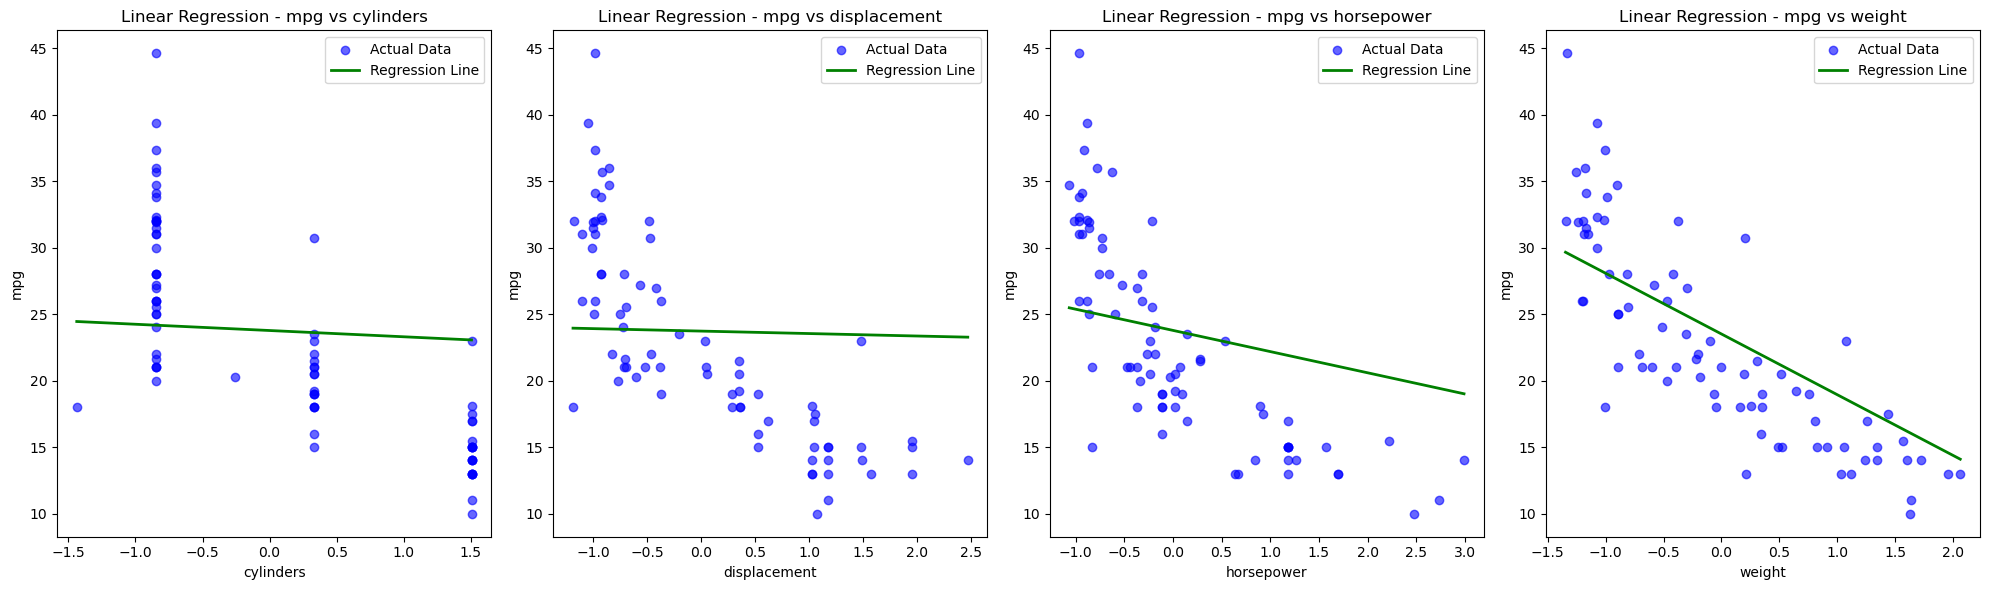

In [126]:
# 모델을 사용하여 예측값 계산
y_pred_x1 = lm.predict(x1_fixed)
y_pred_x2 = lm.predict(x2_fixed)
y_pred_x3 = lm.predict(x3_fixed)
y_pred_x4 = lm.predict(x4_fixed)

# 서브플롯 생성
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# mpg vs cylinders
axes[0].scatter(x1_values, y_test, color='blue', label='Actual Data', alpha=0.6)
axes[0].plot(x1_range, y_pred_x1, color='green', linewidth=2, label='Regression Line')

axes[0].set_xlabel('cylinders')
axes[0].set_ylabel('mpg')
axes[0].set_title('Linear Regression - mpg vs cylinders')
axes[0].legend()

# mpg vs displacement
axes[1].scatter(x2_values, y_test, color='blue', label='Actual Data', alpha=0.6)
axes[1].plot(x2_range, y_pred_x2, color='green', linewidth=2, label='Regression Line')

axes[1].set_xlabel('displacement')
axes[1].set_ylabel('mpg')
axes[1].set_title('Linear Regression - mpg vs displacement')
axes[1].legend()

# mpg vs horsepower
axes[2].scatter(x3_values, y_test, color='blue', label='Actual Data', alpha=0.6)
axes[2].plot(x3_range, y_pred_x3, color='green', linewidth=2, label='Regression Line')

axes[2].set_xlabel('horsepower')
axes[2].set_ylabel('mpg')
axes[2].set_title('Linear Regression - mpg vs horsepower')
axes[2].legend()

# mpg vs weight
axes[3].scatter(x4_values, y_test, color='blue', label='Actual Data', alpha=0.6)
axes[3].plot(x4_range, y_pred_x4, color='green', linewidth=2, label='Regression Line')

axes[3].set_xlabel('weight')
axes[3].set_ylabel('mpg')
axes[3].set_title('Linear Regression - mpg vs weight')
axes[3].legend()

# 그래프 레이아웃 조정 후 출력
plt.tight_layout()
plt.show()

In [127]:
x1_values = X_test[:, 0]
x2_values = X_test[:, 1]
x3_values = X_test[:, 2]
x4_values = X_test[:, 3]

# X_test의 최소/최대 값을 구해 등간격 데이터 생성
x1_min, x1_max = x1_values.min(), x1_values.max()
x2_min, x2_max = x2_values.min(), x2_values.max()
x3_min, x3_max = x3_values.min(), x3_values.max()
x4_min, x4_max = x4_values.min(), x4_values.max()

x1_range = np.linspace(x1_min, x1_max, 100).reshape(-1, 1)
x2_range = np.linspace(x2_min, x2_max, 100).reshape(-1, 1)
x3_range = np.linspace(x3_min, x3_max, 100).reshape(-1, 1)
x4_range = np.linspace(x4_min, x4_max, 100).reshape(-1, 1)

# 다른 변수를 평균값으로 고정하여 예측 데이터 생성
x2_mean = np.mean(x2_values)
x3_mean = np.mean(x3_values)
x4_mean = np.mean(x4_values)

x1_fixed = np.hstack([x1_range, np.full_like(x1_range, x2_mean), np.full_like(x1_range, x3_mean), np.full_like(x1_range, x4_mean)])
x2_fixed = np.hstack([np.full_like(x2_range, np.mean(x1_values)), x2_range, np.full_like(x2_range, x3_mean), np.full_like(x2_range, x4_mean)])
x3_fixed = np.hstack([np.full_like(x3_range, np.mean(x1_values)), np.full_like(x3_range, x2_mean), x3_range, np.full_like(x3_range, x4_mean)])
x4_fixed = np.hstack([np.full_like(x4_range, np.mean(x1_values)), np.full_like(x4_range, x2_mean), np.full_like(x4_range, x3_mean), x4_range])

# 다항 회귀 변환 적용
x1_poly = poly.transform(x1_fixed)
x2_poly = poly.transform(x2_fixed)
x3_poly = poly.transform(x3_fixed)
x4_poly = poly.transform(x4_fixed)

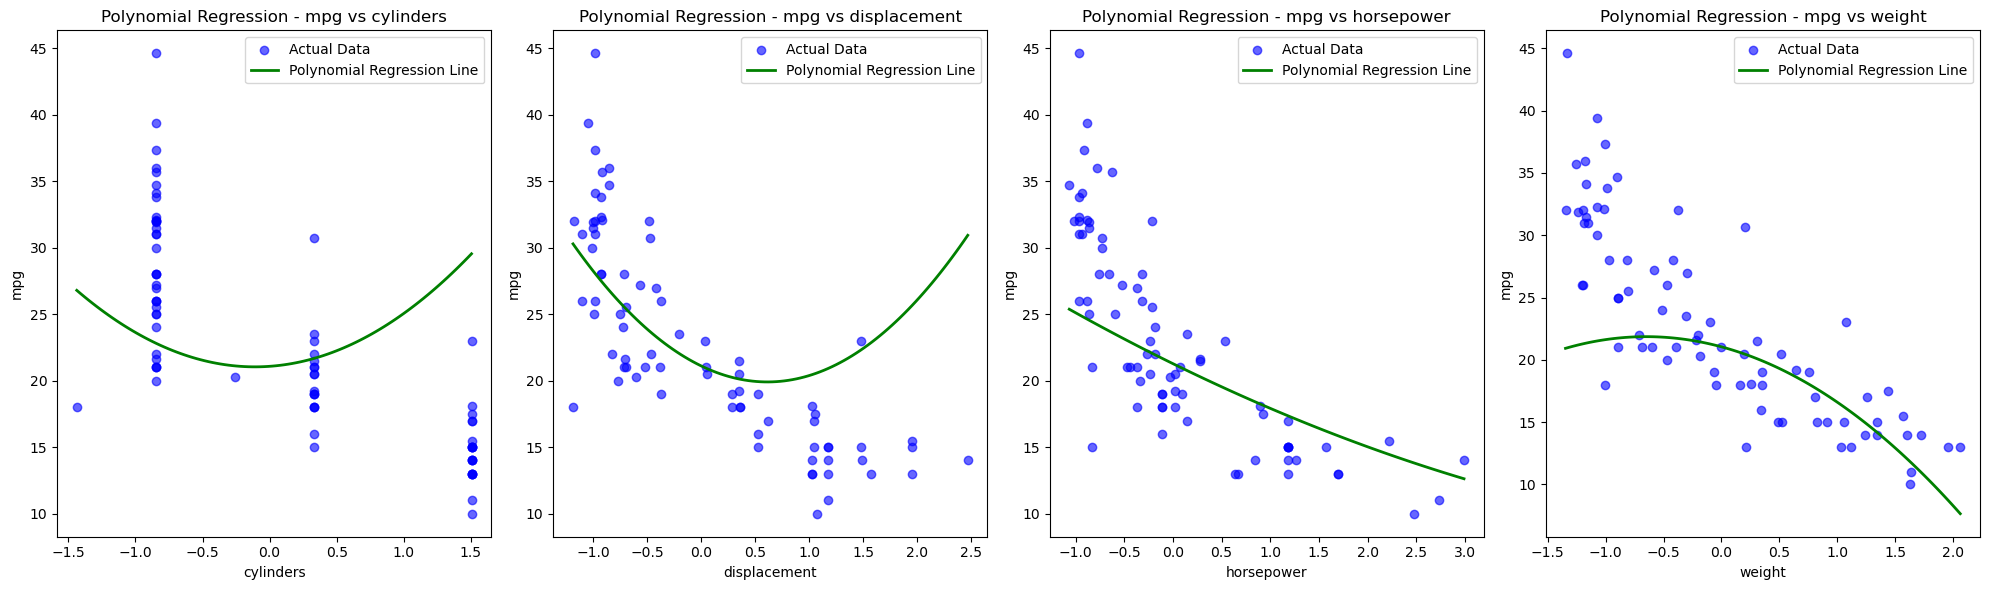

In [128]:
# 다항 회귀 모델을 사용하여 예측값 계산
y_pred_x1 = plm.predict(x1_poly)
y_pred_x2 = plm.predict(x2_poly)
y_pred_x3 = plm.predict(x3_poly)
y_pred_x4 = plm.predict(x4_poly)

# 서브플롯 생성
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# mpg vs cylinders
axes[0].scatter(x1_values, y_test, color='blue', label='Actual Data', alpha=0.6)
axes[0].plot(x1_range, y_pred_x1, color='green', linewidth=2, label='Polynomial Regression Line')

axes[0].set_xlabel('cylinders')
axes[0].set_ylabel('mpg')
axes[0].set_title('Polynomial Regression - mpg vs cylinders')
axes[0].legend()

# mpg vs displacement
axes[1].scatter(x2_values, y_test, color='blue', label='Actual Data', alpha=0.6)
axes[1].plot(x2_range, y_pred_x2, color='green', linewidth=2, label='Polynomial Regression Line')

axes[1].set_xlabel('displacement')
axes[1].set_ylabel('mpg')
axes[1].set_title('Polynomial Regression - mpg vs displacement')
axes[1].legend()

# mpg vs horsepower
axes[2].scatter(x3_values, y_test, color='blue', label='Actual Data', alpha=0.6)
axes[2].plot(x3_range, y_pred_x3, color='green', linewidth=2, label='Polynomial Regression Line')

axes[2].set_xlabel('horsepower')
axes[2].set_ylabel('mpg')
axes[2].set_title('Polynomial Regression - mpg vs horsepower')
axes[2].legend()

# mpg vs weight
axes[3].scatter(x4_values, y_test, color='blue', label='Actual Data', alpha=0.6)
axes[3].plot(x4_range, y_pred_x4, color='green', linewidth=2, label='Polynomial Regression Line')

axes[3].set_xlabel('weight')
axes[3].set_ylabel('mpg')
axes[3].set_title('Polynomial Regression - mpg vs weight')
axes[3].legend()

# 그래프 레이아웃 조정 후 출력
plt.tight_layout()
plt.show()

In [129]:
x1_values = X_test[:, 0]
x2_values = X_test[:, 1]
x3_values = X_test[:, 2]
x4_values = X_test[:, 3]

# X_test의 최소/최대 값을 구해 등간격 데이터 생성
x1_min, x1_max = x1_values.min(), x1_values.max()
x2_min, x2_max = x2_values.min(), x2_values.max()
x3_min, x3_max = x3_values.min(), x3_values.max()
x4_min, x4_max = x4_values.min(), x4_values.max()

x1_range = np.linspace(x1_min, x1_max, 100).reshape(-1, 1)
x2_range = np.linspace(x2_min, x2_max, 100).reshape(-1, 1)
x3_range = np.linspace(x3_min, x3_max, 100).reshape(-1, 1)
x4_range = np.linspace(x4_min, x4_max, 100).reshape(-1, 1)

# 다른 변수를 평균값으로 고정하여 예측 데이터 생성
x2_mean = np.mean(x2_values)
x3_mean = np.mean(x3_values)
x4_mean = np.mean(x4_values)

x1_fixed = np.hstack([x1_range, np.full_like(x1_range, x2_mean), np.full_like(x1_range, x3_mean), np.full_like(x1_range, x4_mean)])
x2_fixed = np.hstack([np.full_like(x2_range, np.mean(x1_values)), x2_range, np.full_like(x2_range, x3_mean), np.full_like(x2_range, x4_mean)])
x3_fixed = np.hstack([np.full_like(x3_range, np.mean(x1_values)), np.full_like(x3_range, x2_mean), x3_range, np.full_like(x3_range, x4_mean)])
x4_fixed = np.hstack([np.full_like(x4_range, np.mean(x1_values)), np.full_like(x4_range, x2_mean), np.full_like(x4_range, x3_mean), x4_range])

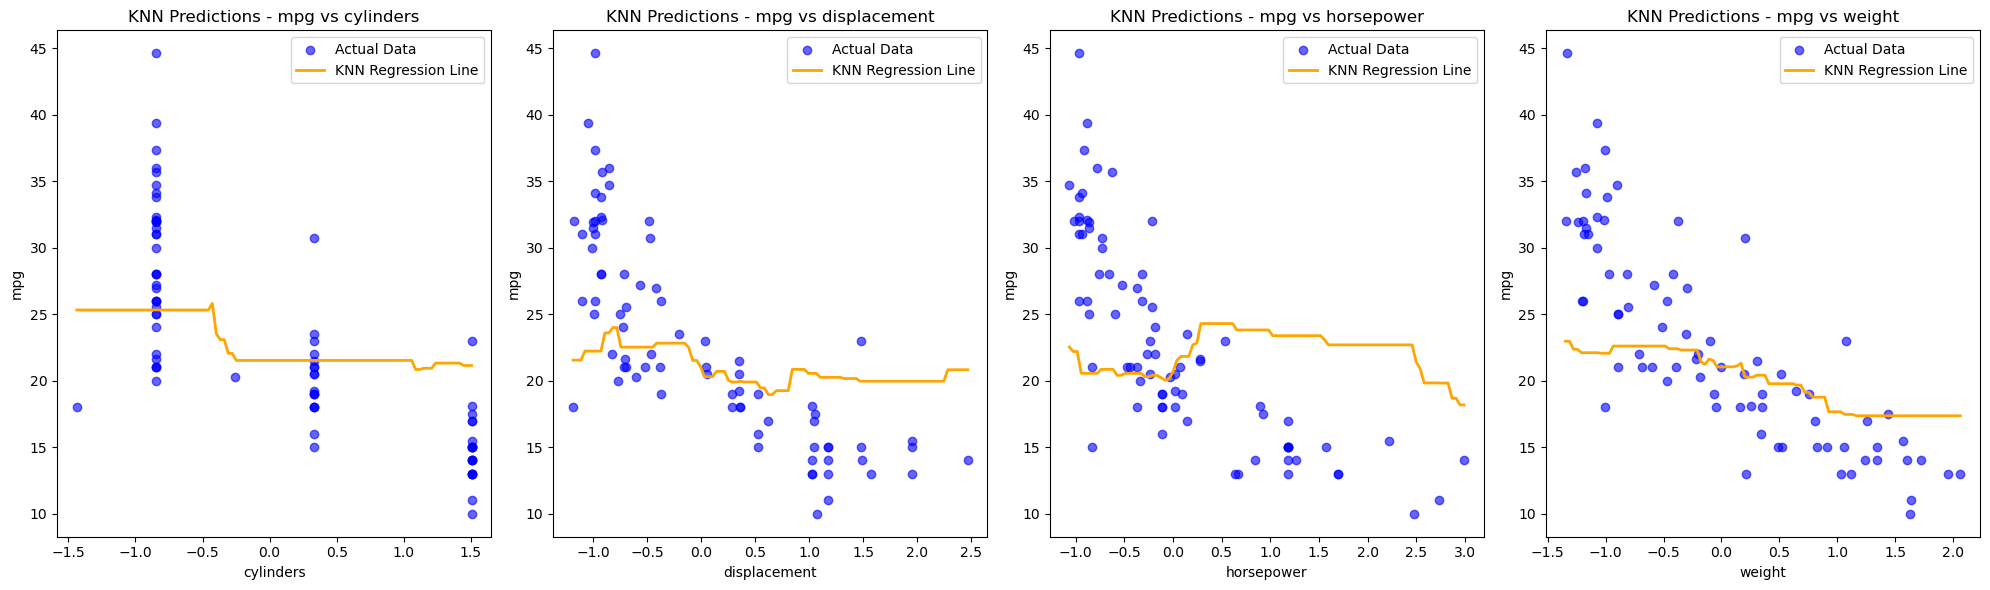

In [130]:
# KNN 회귀 모델을 사용하여 예측값 계산
y_pred_x1 = knn.predict(x1_fixed)
y_pred_x2 = knn.predict(x2_fixed)
y_pred_x3 = knn.predict(x3_fixed)
y_pred_x4 = knn.predict(x4_fixed)

# 서브플롯 생성
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# mpg vs cylinders
axes[0].scatter(x1_values, y_test, color='blue', label='Actual Data', alpha=0.6)
axes[0].plot(x1_range, y_pred_x1, color='orange', linewidth=2, label='KNN Regression Line')

axes[0].set_xlabel('cylinders')
axes[0].set_ylabel('mpg')
axes[0].set_title('KNN Predictions - mpg vs cylinders')
axes[0].legend()

# mpg vs displacement
axes[1].scatter(x2_values, y_test, color='blue', label='Actual Data', alpha=0.6)
axes[1].plot(x2_range, y_pred_x2, color='orange', linewidth=2, label='KNN Regression Line')

axes[1].set_xlabel('displacement')
axes[1].set_ylabel('mpg')
axes[1].set_title('KNN Predictions - mpg vs displacement')
axes[1].legend()

# mpg vs horsepower
axes[2].scatter(x3_values, y_test, color='blue', label='Actual Data', alpha=0.6)
axes[2].plot(x3_range, y_pred_x3, color='orange', linewidth=2, label='KNN Regression Line')

axes[2].set_xlabel('horsepower')
axes[2].set_ylabel('mpg')
axes[2].set_title('KNN Predictions - mpg vs horsepower')
axes[2].legend()

# mpg vs weight
axes[3].scatter(x4_values, y_test, color='blue', label='Actual Data', alpha=0.6)
axes[3].plot(x4_range, y_pred_x4, color='orange', linewidth=2, label='KNN Regression Line')

axes[3].set_xlabel('weight')
axes[3].set_ylabel('mpg')
axes[3].set_title('KNN Predictions - mpg vs weight')
axes[3].legend()

# 그래프 레이아웃 조정 후 출력
plt.tight_layout()
plt.show()

In [131]:
new_data = [[5, 7.5, 12, 15]]

pre_mpg = model.predict(new_data)

print(f" 예상 mpg 는 {pre_mpg[0]:.2f}입니다 ")

 예상 mpg 는 43.72입니다 


c:\Users\KDP-35\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [132]:
new_data = np.array([[5, 7.5, 12, 15]])
new_data_scaled = scaler.transform(new_data)  # 표준화 변환
new_data_poly = poly.transform(new_data_scaled)  # 다항 특성 변환

pred_knn = knn.predict(new_data_scaled)
pred_lm = lm.predict(new_data_scaled)
pred_plm = plm.predict(new_data_poly)

print(f"새로운 데이터 (cylinders=5, displacement=7.5, horsepower=12, weight=15)의 예측값")
print(f"KNN 예측값: {pred_knn[0]:.2f}")
print(f"Linear Regression 예측값: {pred_lm[0]:.2f}")
print(f"Polynomial Regression 예측값: {pred_plm[0]:.2f}")

새로운 데이터 (cylinders=5, displacement=7.5, horsepower=12, weight=15)의 예측값
KNN 예측값: 32.82
Linear Regression 예측값: 43.72
Polynomial Regression 예측값: 42.90


c:\Users\KDP-35\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [133]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [134]:
## 교차검증 객체 생성 - 5개 분할 [기본]
kf = KFold()

## 선형회귀 모델 객체 생성
lr = Ridge()

In [135]:
# RMSE 계산 함수 정의
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [136]:
# 샘플 데이터 생성 (20개의 샘플, 4개의 특성)
np.random.seed(42)
X = np.random.rand(20, 4)
y = np.random.rand(20)

In [137]:
# 학습용/테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
# X_train을 Pandas DataFrame으로 변환 (iloc 사용을 위해)
X_train = pd.DataFrame(X_train, columns=["Feature1", "Feature2", "Feature3", "Feature4"])
y_train = pd.Series(y_train)

In [139]:
# KFold 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [140]:
# 결과 저장용 DataFrame 초기화
resultDF = pd.DataFrame(columns=['alpha', 'train_score', 'test_score', 'train_loss', 'test_loss'])

In [141]:
for alpha in [0.1, 0.5, 1.0, 1.5, 2.0]:

    # Ridge 모델 생성
    lr = Ridge(alpha=alpha)

    train_stotal, test_stotal = 0, 0
    train_ltotal, test_ltotal = 0, 0

    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        # 학습 및 검증 데이터 분리 (Pandas `.iloc[]` 사용)
        train_data, train_label = X_train.iloc[train_index], y_train.iloc[train_index]
        test_data, test_label = X_train.iloc[test_index], y_train.iloc[test_index]

        # 모델 학습
        lr.fit(train_data, train_label)

        # 성능 평가
        train_score = lr.score(train_data, train_label)
        test_score = lr.score(test_data, test_label)

        # 손실 계산 (RMSE)
        train_loss = root_mean_squared_error(train_label, lr.predict(train_data))
        test_loss = root_mean_squared_error(test_label, lr.predict(test_data))

        # 올바르게 행 추가 (컬럼 개수 맞춤)
        resultDF.loc[f'Fold_{i+1}_Train'] = [alpha, train_score, test_score, train_loss, test_loss]
        resultDF.loc[f'Fold_{i+1}_Test'] = [alpha, train_score, test_score, train_loss,  test_loss]

    # 최종 평균 결과 추가 (각 alpha 값에 대해)
    resultDF.loc[f'alpha_{alpha}_mean'] = [
        alpha,
        train_stotal / kf.get_n_splits(),
        test_stotal / kf.get_n_splits(),
        train_ltotal / kf.get_n_splits(),
        test_ltotal / kf.get_n_splits()
    ]

    print(f"평균 Train R² Score: {train_stotal / kf.get_n_splits():.4f}")
    print(f"평균 Test  R² Score: {test_stotal / kf.get_n_splits():.4f}")
    print(f"평균 Train RMSE: {train_ltotal / kf.get_n_splits():.4f}")
    print(f"평균 Test  RMSE: {test_ltotal / kf.get_n_splits():.4f}")



평균 Train R² Score: 0.0000
평균 Test  R² Score: 0.0000
평균 Train RMSE: 0.0000
평균 Test  RMSE: 0.0000
평균 Train R² Score: 0.0000
평균 Test  R² Score: 0.0000
평균 Train RMSE: 0.0000
평균 Test  RMSE: 0.0000
평균 Train R² Score: 0.0000
평균 Test  R² Score: 0.0000
평균 Train RMSE: 0.0000
평균 Test  RMSE: 0.0000
평균 Train R² Score: 0.0000
평균 Test  R² Score: 0.0000
평균 Train RMSE: 0.0000
평균 Test  RMSE: 0.0000
평균 Train R² Score: 0.0000
평균 Test  R² Score: 0.0000
평균 Train RMSE: 0.0000
평균 Test  RMSE: 0.0000
